<a href="https://colab.research.google.com/github/euleralencar/colab_r/blob/main/R_dplyr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Usando R com dplyr

Fonte: https://dplyr.tidyverse.org/articles/dplyr.html

Fonte: https://dplyr.tidyverse.org/reference/index.html

Fonte: https://github.com/rstudio/cheatsheets/blob/master/data-transformation.pdf

Fonte2: https://swapi.dev/


Importando os dados pelo dplyr

In [ ]:
library(dplyr)
# head(starwars, n=3)
starwars <- dplyr::starwars
dim(starwars)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 87 14

### Verbos de tabelas

**dplyr** nos dá funções para cada ver de manipulação de dados. Esses varbos podem ser organizados em 3 categorias baseados em componentes do dataset que trabalha com:

**Rows:**
* filter() chooses rows based on column values.
* slice() chooses rows based on location.
* arrange() changes the order of the rows.

**Columns:**
* select() changes whether or not a column is included.
* rename() changes the name of columns.
* mutate() changes the values of columns and creates new columns.
* relocate() changes the order of the columns.

**Groups of rows:**
* summarise() collapses a group into a single row.

### Rows

#### Filter: filtrando valores das colunas

In [ ]:
# Essa função a virgula funciona como "E"
head(starwars %>% filter(skin_color == "light", eye_color == "brown"), n=3)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Leia Organa,150,49,brown,light,brown,19,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,
Biggs Darklighter,183,84,black,light,brown,24,male,masculine,Tatooine,Human,A New Hope,,X-wing
Cordé,157,NA,brown,light,brown,NA,female,feminine,Naboo,Human,Attack of the Clones,,


#### Arrange: ordenar os dados

In [ ]:
# Para ordenar dados
head(starwars %>% arrange(height, mass), n=4)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Yoda,66,17,white,green,brown,896,male,masculine,NA,Yoda's species,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi",,
Ratts Tyerell,79,15,none,"grey, blue",unknown,NA,male,masculine,Aleen Minor,Aleena,The Phantom Menace,,
Wicket Systri Warrick,88,20,brown,brown,brown,8,male,masculine,Endor,Ewok,Return of the Jedi,,
Dud Bolt,94,45,none,"blue, grey",yellow,NA,male,masculine,Vulpter,Vulptereen,The Phantom Menace,,


In [ ]:
# Para ordenar de forma descendente
head(starwars %>% arrange(desc(height)),4)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Yarael Poof,264,NA,none,white,yellow,NA,male,masculine,Quermia,Quermian,The Phantom Menace,,
Tarfful,234,136,brown,brown,blue,NA,male,masculine,Kashyyyk,Wookiee,Revenge of the Sith,,
Lama Su,229,88,none,grey,black,NA,male,masculine,Kamino,Kaminoan,Attack of the Clones,,
Chewbacca,228,112,brown,unknown,blue,200,male,masculine,Kashyyyk,Wookiee,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",AT-ST,"Millennium Falcon, Imperial shuttle"


#### Slice: selecionando algumas linhas específicas

In [ ]:
# Para selecionar uma quantidade X de linhas
starwars %>% slice(5:9)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Leia Organa,150,49,brown,light,brown,19,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,"brown, grey",light,blue,52,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,
Beru Whitesun lars,165,75,brown,light,blue,47,female,feminine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,
R5-D4,97,32,NA,"white, red",red,NA,none,masculine,Tatooine,Droid,A New Hope,,
Biggs Darklighter,183,84,black,light,brown,24,male,masculine,Tatooine,Human,A New Hope,,X-wing


In [ ]:
# Sorteio usando sample
starwars %>% slice_sample(n = 5)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Beru Whitesun lars,165,75,brown,light,blue,47,female,feminine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,
R5-D4,97,32,NA,"white, red",red,NA,none,masculine,Tatooine,Droid,A New Hope,,
Arvel Crynyd,NA,NA,brown,fair,brown,NA,male,masculine,NA,Human,Return of the Jedi,,A-wing
Nien Nunb,160,68,none,grey,black,NA,male,masculine,Sullust,Sullustan,Return of the Jedi,,Millennium Falcon
Shaak Ti,178,57,none,"red, blue, white",black,NA,female,feminine,Shili,Togruta,"Attack of the Clones, Revenge of the Sith",,


In [ ]:
starwars %>% slice_sample(n = 5) #observe que a tabela é diferente da anterior com o mesmo comando

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Poe Dameron,NA,NA,brown,light,brown,NA,male,masculine,NA,Human,The Force Awakens,,T-70 X-wing fighter
Eeth Koth,171,NA,black,brown,brown,NA,male,masculine,Iridonia,Zabrak,"The Phantom Menace , Revenge of the Sith",,
Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1
Bib Fortuna,180,NA,none,pale,pink,NA,male,masculine,Ryloth,Twi'lek,Return of the Jedi,,
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,


#### Combinando: dois pipes ou mais

In [ ]:
# Filtrando os valores NA
starwars %>%
  filter(is.na(height)) 

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Arvel Crynyd,NA,NA,brown,fair,brown,NA,male,masculine,NA,Human,Return of the Jedi,,A-wing
Finn,NA,NA,black,dark,dark,NA,male,masculine,NA,Human,The Force Awakens,,
Rey,NA,NA,brown,light,hazel,NA,female,feminine,NA,Human,The Force Awakens,,
Poe Dameron,NA,NA,brown,light,brown,NA,male,masculine,NA,Human,The Force Awakens,,T-70 X-wing fighter
BB8,NA,NA,none,none,black,NA,none,masculine,NA,Droid,The Force Awakens,,
Captain Phasma,NA,NA,unknown,unknown,unknown,NA,NA,NA,NA,NA,The Force Awakens,,


In [ ]:
# Combinando funções para pegar os três maiores valores de "height" retirando os valores NA
starwars %>%
  filter(!is.na(height)) %>%
  slice_max(height, n = 3)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Yarael Poof,264,NA,none,white,yellow,NA,male,masculine,Quermia,Quermian,The Phantom Menace,,
Tarfful,234,136,brown,brown,blue,NA,male,masculine,Kashyyyk,Wookiee,Revenge of the Sith,,
Lama Su,229,88,none,grey,black,NA,male,masculine,Kamino,Kaminoan,Attack of the Clones,,


#### Select: selecionando variáveis

In [ ]:
# Selecionar colunas com SELECT
head(starwars %>% select(hair_color, skin_color, eye_color))

hair_color,skin_color,eye_color
<chr>,<chr>,<chr>
blond,fair,blue
NA,gold,yellow
NA,"white, blue",red
none,white,yellow
brown,light,brown
"brown, grey",light,blue


In [ ]:
head(starwars %>% select(hair_color:eye_color)) # segunda forma de fazer

hair_color,skin_color,eye_color
<chr>,<chr>,<chr>
blond,fair,blue
NA,gold,yellow
NA,"white, blue",red
none,white,yellow
brown,light,brown
"brown, grey",light,blue


In [ ]:
head(starwars %>% select(!(hair_color:eye_color))) # retirando a coluna "eyecolor"

name,height,mass,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Luke Skywalker,172,77,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",,
R2-D2,96,32,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,
Darth Vader,202,136,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1
Leia Organa,150,49,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,


In [ ]:
head(starwars %>% select(ends_with("color"))) #selecionar colunas que tem "color" no final

hair_color,skin_color,eye_color
<chr>,<chr>,<chr>
blond,fair,blue
NA,gold,yellow
NA,"white, blue",red
none,white,yellow
brown,light,brown
"brown, grey",light,blue


In [ ]:
# Pode renomear uma variável com o argumento de select(). O primeiro argumento é o novo nome e o segundo é o nome antigo.

head(starwars %>% select(home_world = homeworld))

home_world
<chr>
Tatooine
Tatooine
Naboo
Tatooine
Alderaan
Tatooine


O uso de select() drops todas as variáveis não explicitadas na função, por isso não é tão útil. No lugar, podemos usar rename().

#### Rename: renomear o nome das variáveis

In [ ]:
head(starwars %>% rename(home_world = homeworld))

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,home_world,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",,
R2-D2,96,32,NA,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,
Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1
Leia Organa,150,49,brown,light,brown,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,


#### Mutate: criando novas colunas

In [ ]:
head(starwars %>% mutate(height_m = height / 100), n=3)

Usando mutate a tabela vai para o final. Por isso, usamos select everythin após para colocar na primeira coluna e enviar para o final.

In [ ]:
  head(starwars %>%
      mutate(height_m = height / 100) %>%
        select(height_m, height, everything()), n=3)

In [ ]:
# Se eu quiser manter apenas a nova variável então usar transmute():

head(
  starwars %>%
    transmute(
      height_m = height / 100,
      BMI = mass / (height_m^2)
           )
    )

height_m,BMI
<dbl>,<dbl>
1.72,26.02758
1.67,26.89232
0.96,34.72222
2.02,33.33007
1.50,21.77778
1.78,37.87401


#### Realocate: para mudar ordem das colunas

In [ ]:
names(starwars)

[1] "name"       "height"     "mass"       "hair_color" "skin_color"
 [6] "eye_color"  "birth_year" "sex"        "gender"     "homeworld" 
[11] "species"    "films"      "vehicles"   "starships"

In [ ]:
# Pegamos o grupo: sex, gender e homeword e jogamos para antes de height
names(
    starwars %>% 
      relocate(sex:homeworld, .before = height)
)


[1] "name"       "sex"        "gender"     "homeworld"  "height"    
 [6] "mass"       "hair_color" "skin_color" "eye_color"  "birth_year"
[11] "species"    "films"      "vehicles"   "starships"

Se eu quisesse pegar 3 colunas e posição não sequenciais e colocá-los em lugares específicos? Teria alguma forma de fazer isso?

In [ ]:
starwars %>% summarise(height = mean(height, na.rm = TRUE))


height
<dbl>
174.358


#### Combinando função com o Pipe

In [ ]:
dim(starwars)

[1] 87 14

In [ ]:
a1 <- group_by(starwars, species, sex);
dim(a1)

[1] 87 14

In [ ]:
a2 <- select(a1, height, mass); dim(a2)

Adding missing grouping variables: `species`, `sex`



[1] 87  4

In [ ]:
a3 <- summarise(a2,
  height = mean(height, na.rm = TRUE),
  mass = mean(mass, na.rm = TRUE)
)
dim(a3)

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.



[1] 41  4

In [ ]:
# Foi obtido dados sumarizados das espécies por sexo, pegando a altura e o peso dos indivíduos
head(
  summarise(
        select(
          group_by(starwars, species, sex),
          height, mass
              ),
              height = mean(height, na.rm = TRUE),
              mass = mean(mass, na.rm = TRUE)
            )
     )

Adding missing grouping variables: `species`, `sex`

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.



species,sex,height,mass
<chr>,<chr>,<dbl>,<dbl>
Aleena,male,79.0,15.00
Besalisk,male,198.0,102.00
Cerean,male,198.0,82.00
Chagrian,male,196.0,NaN
Clawdite,female,168.0,55.00
Droid,none,131.2,69.75


Podemos sempre tornar o código mais elegante. Aqui o que fizemos é começamos pela **dado: starwars**, depois demos um **group_by** nas **variáveis categóricas** que desejamos sumarizar: **species e sex**. Após, **selecionamos** as **variáveis quantitativas** que iremos sumarizar pela média: **height e mass**. Por fim, usamos **summarise** utilizando as **medidas de média** para **height e mass**, definidas no group_by. Veja:

In [ ]:
starwars %>%
  group_by(species, sex) %>%
    select(height, mass) %>%
      summarise(
        height = mean(height, na.rm = TRUE),
        mass = mean(mass, na.rm = TRUE)
      )

#### Padrões das operações

Há discussão interessantes sobre os padrões das operações, quando por exemplo, damos valor a uma variável e a utilizamos dentro dos operadores. 

A semântica **mutate** é bastante diferente da semântica do **select**. Enquanto select() espera nomes ou posições de coluna, mutate() espera vetores de coluna. 

Essas discussões podem ser vistas neste link:
https://dplyr.tidyverse.org/articles/dplyr.html#patterns-of-operations




In [ ]:
b1 = starwars %>%
        select(name, height, mass, sex, gender, species) %>% 
          slice_head(n=6)
head(b1)

name,height,mass,sex,gender,species
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
Luke Skywalker,172,77,male,masculine,Human
C-3PO,167,75,none,masculine,Droid
R2-D2,96,32,none,masculine,Droid
Darth Vader,202,136,male,masculine,Human
Leia Organa,150,49,female,feminine,Human
Owen Lars,178,120,male,masculine,Human


In [ ]:
group_by(b1, sex)

name,height,mass,sex,gender,species
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
Luke Skywalker,172,77,male,masculine,Human
C-3PO,167,75,none,masculine,Droid
R2-D2,96,32,none,masculine,Droid
Darth Vader,202,136,male,masculine,Human
Leia Organa,150,49,female,feminine,Human
Owen Lars,178,120,male,masculine,Human


In [ ]:
group_by(b1, sex = as.factor(sex))

name,height,mass,sex,gender,species
<chr>,<int>,<dbl>,<fct>,<chr>,<chr>
Luke Skywalker,172,77,male,masculine,Human
C-3PO,167,75,none,masculine,Droid
R2-D2,96,32,none,masculine,Droid
Darth Vader,202,136,male,masculine,Human
Leia Organa,150,49,female,feminine,Human
Owen Lars,178,120,male,masculine,Human


In [ ]:
# este é um exemplo de como a função de adequa
group_by(b1, height_binned = cut(height, 3))

name,height,mass,sex,gender,species,height_binned
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<fct>
Luke Skywalker,172,77,male,masculine,Human,"(167,202]"
C-3PO,167,75,none,masculine,Droid,"(167,202]"
R2-D2,96,32,none,masculine,Droid,"(95.9,131]"
Darth Vader,202,136,male,masculine,Human,"(167,202]"
Leia Organa,150,49,female,feminine,Human,"(131,167]"
Owen Lars,178,120,male,masculine,Human,"(167,202]"


#### Explicações sobre o GROUP_BY

Explicações melhores sobre esta função group_by:

https://dplyr.tidyverse.org/reference/group_by.html

In [ ]:
data_mtcars <- mtcars; head(data_mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Interessante que nos dados temos as marcas aparecendo no dataset, como um index. Contudo no gruop_by não aparece.

In [ ]:
by_cyl <- mtcars %>% group_by(cyl)

# o group_by não muda como os dados são mostrados. (além da lista como é agrupado)

head(by_cyl,5)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
# Há mudanças quando age junto a outro verbo do dplyr:
by_cyl %>% summarise(
  disp = mean(disp),
  hp = mean(hp)
)

cyl,disp,hp
<dbl>,<dbl>,<dbl>
4,105.1364,82.63636
6,183.3143,122.28571
8,353.1000,209.21429


In [ ]:
# Each call to summarise() removes a layer of grouping
by_vs_am <- mtcars %>% group_by(vs, am)


In [ ]:
by_vs <- by_vs_am %>% summarise(n = n())

`summarise()` has grouped output by 'vs'. You can override using the `.groups` argument.



In [ ]:
by_vs

vs,am,n
<dbl>,<dbl>,<int>
0,0,12
0,1,6
1,0,7
1,1,7


In [ ]:
# Utiliza o primeiro argumento de group_by para fazer o summarise novamente
by_vs %>% summarise(n = sum(n))

vs,n
<dbl>,<int>
0,18
1,14


In [ ]:
# To removing grouping, use ungroup
by_vs %>%
  ungroup() %>%
  summarise(n = sum(n))

n
<int>
32


In [ ]:
# Por default, group_by() substitui os grupos existentes anteriormente
by_cyl %>%
  group_by(vs, am) %>%
  group_vars()

[1] "vs" "am"

In [ ]:
# Use add = TRUE para apensar novos grupos
by_cyl %>%
  group_by(vs, am, .add = TRUE) %>%
  group_vars()
# o grupo cyl já estava no grupo by e agora foi apensado mais dois grupos

[1] "cyl" "vs"  "am"

In [ ]:
by_vs <- by_cyl %>% summarise(n = n()); by_vs

cyl,n
<dbl>,<int>
4,11
6,7
8,14


In [ ]:
# when factors are involved and .drop = FALSE, groups can be empty
tbl <- tibble(
  x = 1:10,
  y = factor(rep(c("a", "c"), each  = 5), levels = c("a", "b", "c"))
)

In [ ]:
tbl

x,y
<int>,<fct>
1,a
2,a
3,a
4,a
5,a
6,c
7,c
8,c
9,c


In [ ]:
tbl %>%
  group_by(y, .drop = FALSE) %>%
    group_rows()

<list_of<integer>[3]>
[[1]]
[1] 1 2 3 4 5

[[2]]
integer(0)

[[3]]
[1]  6  7  8  9 10

In [ ]:
tbl %>%
  group_by(y, .drop = FALSE)

x,y
<int>,<fct>
1,a
2,a
3,a
4,a
5,a
6,c
7,c
8,c
9,c


In [ ]:
tbl %>%
  group_by(y, .drop = FALSE) %>%
    summarise(tot = sum(x))

y,tot
<fct>,<int>
a,15
b,0
c,40


In [ ]:
tbl %>%
  group_by(y, .drop = TRUE) %>%
    summarise(tot = sum(x))

y,tot
<fct>,<int>
a,15
c,40


A diferença do TRUE para FALSE é retirar as linhas que ficam nulas.

### Juntando duas bases

Fonte: https://dplyr.tidyverse.org/reference/join.html
Fonte: https://rpubs.com/williamsurles/

These are generic functions that dispatch to individual tbl methods - see the method documentation for details of individual data sources. x and y should usually be from the same data source, but if copy is TRUE, y will automatically be copied to the same source as x.



```
inner_join(x, y, by = NULL, copy = FALSE, suffix = c(".x", ".y"),
  ...)

left_join(x, y, by = NULL, copy = FALSE, suffix = c(".x", ".y"), ...)

right_join(x, y, by = NULL, copy = FALSE, suffix = c(".x", ".y"),
  ...)

full_join(x, y, by = NULL, copy = FALSE, suffix = c(".x", ".y"), ...)

semi_join(x, y, by = NULL, copy = FALSE, ...)

nest_join(x, y, by = NULL, copy = FALSE, keep = FALSE, name = NULL,
  ...)

anti_join(x, y, by = NULL, copy = FALSE, ...)
```







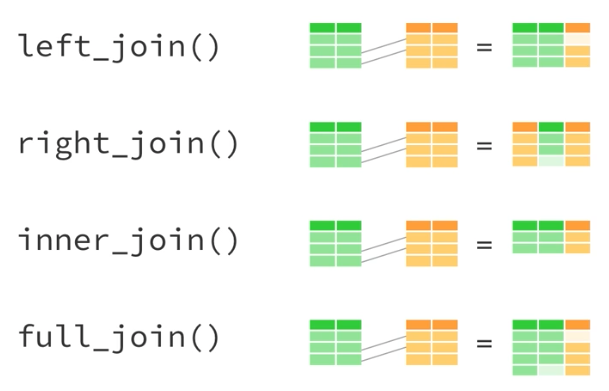

**Vamos começar usando a base de dados sobre bandas**

#### Tabelas Básicas

Vamos estudos os 4 tipos básicos de relacionamento de tabelas:


*   Inner join: intersecção das tabelas
*   Left join: tabela fato + tabela apoio
*   Right join: tabela apoio + tabela fato
*   Full join: junção completa de tabelas





In [ ]:
band_members

name,band
<chr>,<chr>
Mick,Stones
John,Beatles
Paul,Beatles


In [ ]:
band_instruments

name,plays
<chr>,<chr>
John,guitar
Paul,bass
Keith,guitar


##### Inner Join

Vamos começar com Inner Join. O que ele faz? Traz as informações comuns nas duas tabelas.

O que espera que aconteça com Inner Join aqui?
R.: Trara apenas John e Paul, já que são os elementos comuns das duas colunas chaves.

In [ ]:
band_members %>% inner_join(band_instruments)

Joining, by = "name"



name,band,plays
<chr>,<chr>,<chr>
John,Beatles,guitar
Paul,Beatles,bass


##### Left Join

No left case é como se fosse um PROCV do excel. Ele faz a procura pelo tabela "band_members" (left) e procura as informações "band_instruments" (right). Veja:

In [ ]:
band_members %>% left_join(band_instruments)

Joining, by = "name"



name,band,plays
<chr>,<chr>,<chr>
Mick,Stones,NA
John,Beatles,guitar
Paul,Beatles,bass


##### Right Join

A lógica do right join semelhante com o LEFT JOIN porém usando a tabela da direita como referência, invés da esquerda.

In [ ]:
band_members %>% right_join(band_instruments)

Joining, by = "name"



name,band,plays
<chr>,<chr>,<chr>
John,Beatles,guitar
Paul,Beatles,bass
Keith,NA,guitar


##### Full Join

A lógica aqui é a seguinte. Imagine que tenha duas tabelas com nome do funcionários e seus telefones. Outra tabela que possui nome dos funcionário e voluntários e seus endereços. Quero juntar toda a tabela numa só com os 3 campos. Aqueles campos que não possuirem correspondência ficaram com valores nulos.

In [ ]:
band_members %>% full_join(band_instruments)

Joining, by = "name"



name,band,plays
<chr>,<chr>,<chr>
Mick,Stones,NA
John,Beatles,guitar
Paul,Beatles,bass
Keith,NA,guitar


#### Tabelas Especiais

Há 4 operações especiais em tabelas que são importantes de ser apreendidas. 

* Semi Join
* Anti Join
* Nest Join
* Chaves diferentes

##### Semi Join

In [ ]:
# "Filtering" joins keep cases from the LHS
band_members %>% semi_join(band_instruments)


Joining, by = "name"



name,band
<chr>,<chr>
John,Beatles
Paul,Beatles


semi join retorna todas as linhas de x onde há valores correspondentes em y, mantendo apenas as colunas de x. Uma semi-junção difere de uma Inner Join porque este retornará uma linha de x para cada linha correspondente de y, onde uma semi-junção nunca duplicará linhas de x.

##### Anti Join

In [ ]:
band_members %>% anti_join(band_instruments)

Joining, by = "name"



name,band
<chr>,<chr>
Mick,Stones


##### Nest Join ???

In [ ]:
# "Nesting" joins keep cases from the LHS and nests the RHS
band_members %>% nest_join(band_instruments) #Não entendi muito bem

Joining, by = "name"



name,band,band_instruments
<chr>,<chr>,<list>
Mick,Stones,
John,Beatles,guitar
Paul,Beatles,bass


In [ ]:
# To suppress the message, supply by
band_members %>% inner_join(band_instruments, by = "name")

name,band,plays
<chr>,<chr>,<chr>
John,Beatles,guitar
Paul,Beatles,bass


##### Chaves diferentes

Join em colunas com nomes diferentes

In [ ]:
band_members

name,band
<chr>,<chr>
Mick,Stones
John,Beatles
Paul,Beatles


In [ ]:
band_instruments2

artist,plays
<chr>,<chr>
John,guitar
Paul,bass
Keith,guitar


In [ ]:
# Use a named `by` if the join variables have different names
band_members %>% full_join(band_instruments2, by = c("name" = "artist"))

name,band,plays
<chr>,<chr>,<chr>
Mick,Stones,NA
John,Beatles,guitar
Paul,Beatles,bass
Keith,NA,guitar


### Estudo com tabelas maiores

Variations on joins
* **left_join** - prioritizes left dataset
* **right_join** - prioritizes right dataset
* **inner_join** - only retains rows in both datasets
* **full_join** - retains all rows
* **Use %>% (pipes)** to string together these joins


Fonte: https://rpubs.com/williamsurles/293454

Fonte:
https://rpubs.com/jonathan-keith/360527

Fonte: https://campus.datacamp.com/courses/joining-data-with-dplyr/joining-tables-1?ex=1

Livro: https://r4ds.had.co.nz/r-markdown.html

Cheat Sheet: https://rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf



In [ ]:
##### Criando base de dados

Site para obter as tabelas abaixo:

Fonte: https://rstudio-pubs-static.s3.amazonaws.com/480907_19b810455f274054b92be7fa91b12cae.html#whats-covered





In [ ]:
artistsKH <- tibble(first = c("Jimmy", "George", "Mick", "Tom", "Davy", "John", "Paul", "Jimmy", "Joe", "Elvis", "Keith", "Paul", "Ringo", "Joe", "Brian", "Nancy"), last = c("Buffett", "Harrison", "Jagger", "Jones", "Jones", "Lennon", "McCartney", "Page", "Perry", "Presley", "Richards", "Simon", "Starr", "Walsh", "Wilson", "Wilson"), instrument = c("Guitar", "Guitar", "Vocals", "Vocals", "Vocals", "Guitar", "Bass", "Guitar", "Guitar", "Vocals", "Guitar", "Guitar", "Drums", "Guitar", "Vocals", "Vocals"))

# artistsKH == artists - verified in line with what was given
artists <- artistsKH
artists


first,last,instrument
<chr>,<chr>,<chr>
Jimmy,Buffett,Guitar
George,Harrison,Guitar
Mick,Jagger,Vocals
Tom,Jones,Vocals
Davy,Jones,Vocals
John,Lennon,Guitar
Paul,McCartney,Bass
Jimmy,Page,Guitar
Joe,Perry,Guitar


In [ ]:
bandsKH <- tibble(first = c("John", "John Paul", "Jimmy", "Robert", "George", "John", "Paul", "Ringo", "Jimmy", "Mick", "Keith", "Charlie", "Ronnie"), last = c("Bonham", "Jones", "Page", "Plant", "Harrison", "Lennon", "McCartney", "Starr", "Buffett", "Jagger", "Richards", "Watts", "Wood"), band = c("Led Zeppelin", "Led Zeppelin", "Led Zeppelin", "Led Zeppelin", "The Beatles", "The Beatles", "The Beatles", "The Beatles", "The Coral Reefers", "The Rolling Stones", "The Rolling Stones", "The Rolling Stones", "The Rolling Stones"))

# bandsKH == bands - verified in line with what was given
bands <- bandsKH
bands

first,last,band
<chr>,<chr>,<chr>
John,Bonham,Led Zeppelin
John Paul,Jones,Led Zeppelin
Jimmy,Page,Led Zeppelin
Robert,Plant,Led Zeppelin
George,Harrison,The Beatles
John,Lennon,The Beatles
Paul,McCartney,The Beatles
Ringo,Starr,The Beatles
Jimmy,Buffett,The Coral Reefers


In [ ]:
albumsKH <- tibble(
                album = c("A Hard Day's Night", "Magical Mystery Tour", "Beggar's Banquet", "Abbey Road", "Led Zeppelin IV", "The Dark Side of the Moon", "Aerosmith", "Rumours", "Hotel California"),
                 band = c("The Beatles", "The Beatles", "The Rolling Stones", "The Beatles", "Led Zeppelin", "Pink Floyd", "Aerosmith", "Fleetwood Mac", "Eagles"), 
                 year = c(1964,1967,1968,1969,1971,1973,1973,1977,1982)
                 )

# albumsKH == albums - verified in line with what was given
albums <- albumsKH
albums

album,band,year
<chr>,<chr>,<dbl>
A Hard Day's Night,The Beatles,1964
Magical Mystery Tour,The Beatles,1967
Beggar's Banquet,The Rolling Stones,1968
Abbey Road,The Beatles,1969
Led Zeppelin IV,Led Zeppelin,1971
The Dark Side of the Moon,Pink Floyd,1973
Aerosmith,Aerosmith,1973
Rumours,Fleetwood Mac,1977
Hotel California,Eagles,1982


In [ ]:
songsKH <- tibble(
                 song = c("Come Together", "Dream On", "Hello, Goodbye", "It's Not Unusual"),
                 album  = c("Abbey Road", "Aerosmith", "Magical Mystery Tour", "Along Came Jones"), 
                 first = c("John", "Steven", "Paul", "Tom"), 
                 last = c("Lennon", "Tyler", "McCartney", "Jones")
                 )

# songsKH == songs - verified in line with what was given
songs <- songsKH
songs

song,album,first,last
<chr>,<chr>,<chr>,<chr>
Come Together,Abbey Road,John,Lennon
Dream On,Aerosmith,Steven,Tyler
"Hello, Goodbye",Magical Mystery Tour,Paul,McCartney
It's Not Unusual,Along Came Jones,Tom,Jones


##### Left Join: usando duas variáveis como chave única

In [ ]:
# Quero fazer cruzamento com nome e sobrenome, por isso utilizo first e last como chaves de cruzamento
bands2 <- left_join(bands, artists, by = c('first','last'))

# Examine the results
head(bands2)

first,last,band,instrument
<chr>,<chr>,<chr>,<chr>
John,Bonham,Led Zeppelin,NA
John Paul,Jones,Led Zeppelin,NA
Jimmy,Page,Led Zeppelin,Guitar
Robert,Plant,Led Zeppelin,NA
George,Harrison,The Beatles,Guitar
John,Lennon,The Beatles,Guitar


In [ ]:
# Observe se só utilizasse o first, os problemas que teria:

# Complete the code to join artists to bands
bands3 <- left_join(bands, artists, by = 'first')

# Examine the results
bands3

first,last.x,band,last.y,instrument
<chr>,<chr>,<chr>,<chr>,<chr>
John,Bonham,Led Zeppelin,Lennon,Guitar
John Paul,Jones,Led Zeppelin,NA,NA
Jimmy,Page,Led Zeppelin,Buffett,Guitar
Jimmy,Page,Led Zeppelin,Page,Guitar
Robert,Plant,Led Zeppelin,NA,NA
George,Harrison,The Beatles,Harrison,Guitar
John,Lennon,The Beatles,Lennon,Guitar
Paul,McCartney,The Beatles,McCartney,Bass
Paul,McCartney,The Beatles,Simon,Guitar


Obsever que quando utilizo apenas o nome como chave, quando pego Jimmy, como há no banco de artists Buffet e Page ele duplica a linha para garantir que todos os registros foram feitos. Isso acontece pq a coluna "first" não é de fato uma chave única.

##### Inner Join

In [ ]:
inner_join(songs, albums, by = "album")

song,album,first,last,band,year
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Come Together,Abbey Road,John,Lennon,The Beatles,1969
Dream On,Aerosmith,Steven,Tyler,Aerosmith,1973
"Hello, Goodbye",Magical Mystery Tour,Paul,McCartney,The Beatles,1967


In [ ]:
# Quero a tabela de artistas e juntar como nome da sua banda
full_join(artists, bands, by = c("first","last"))

first,last,instrument,band
<chr>,<chr>,<chr>,<chr>
Jimmy,Buffett,Guitar,The Coral Reefers
George,Harrison,Guitar,The Beatles
Mick,Jagger,Vocals,The Rolling Stones
Tom,Jones,Vocals,NA
Davy,Jones,Vocals,NA
John,Lennon,Guitar,The Beatles
Paul,McCartney,Bass,The Beatles
Jimmy,Page,Guitar,Led Zeppelin
Joe,Perry,Guitar,NA


##### Exercício 1:

Como descubro os artistas que não estão na tabela de artistas, mas estão nas tabela de banda e vice versa?

R.: Posso usar o anti join.

In [ ]:
artists %>% 
  anti_join(bands, by=c("first","last"))

first,last,instrument
<chr>,<chr>,<chr>
Tom,Jones,Vocals
Davy,Jones,Vocals
Joe,Perry,Guitar
Elvis,Presley,Vocals
Paul,Simon,Guitar
Joe,Walsh,Guitar
Brian,Wilson,Vocals
Nancy,Wilson,Vocals


In [ ]:
bands %>% 
  anti_join(artists, by=c("first","last"))

first,last,band
<chr>,<chr>,<chr>
John,Bonham,Led Zeppelin
John Paul,Jones,Led Zeppelin
Robert,Plant,Led Zeppelin
Charlie,Watts,The Rolling Stones
Ronnie,Wood,The Rolling Stones


##### Exercício 2:

Ache o guitarristas das bandas.

In [ ]:
temp <- left_join(bands, artists, by = c("first", "last"))


In [ ]:
temp <- filter(temp, instrument == "Guitar")

In [ ]:
select(temp, first, last, band)

first,last,band
<chr>,<chr>,<chr>
Jimmy,Page,Led Zeppelin
George,Harrison,The Beatles
John,Lennon,The Beatles
Jimmy,Buffett,The Coral Reefers
Keith,Richards,The Rolling Stones


Deixe o código mais elegante com pipe

In [ ]:
bands %>% 
  left_join(artists, by = c("first","last")) %>%
  filter(instrument == "Guitar") %>%
  select(first, last, band)

first,last,band
<chr>,<chr>,<chr>
Jimmy,Page,Led Zeppelin
George,Harrison,The Beatles
John,Lennon,The Beatles
Jimmy,Buffett,The Coral Reefers
Keith,Richards,The Rolling Stones


##### Exercício 3:

Pratique com pipe e joins

* Examine o conteúdo como seu objetivo.

```
## # A tibble: 3 x 6
##   first      last instrument        band             song
##   <chr>     <chr>      <chr>       <chr>            <chr>
## 1   Tom     Jones     Vocals        <NA> It's Not Unusual
## 2  John    Lennon     Guitar The Beatles    Come Together
## 3  Paul McCartney       Bass The Beatles   Hello, Goodbye
## # ... with 1 more variables: album <chr>
```



In [ ]:
names(artists)

[1] "first"      "last"       "instrument"

In [ ]:
names(bands)

[1] "first" "last"  "band"

In [ ]:
names(songs)

[1] "song"  "album" "first" "last"

In [ ]:
names(albums)

[1] "album" "band"  "year"

O primeiro passo é observar as variáveis em cada um dos bancos de dados. Repare que as três primeiras colunas são as mesmas da tabela artists. A quarta é uma das colunas da tabela bands. Por fim, há a coluna songs da tabela songs.

Observa-se também que a dimensão é 3x6.

In [ ]:
artists %>%
  left_join(bands, by=c('first','last')) %>%
    inner_join(songs, by=c('first','last')) #%>%
#      select(!album)  -> se quisesse tirar a variável album

first,last,instrument,band,song,album
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Tom,Jones,Vocals,NA,It's Not Unusual,Along Came Jones
John,Lennon,Guitar,The Beatles,Come Together,Abbey Road
Paul,McCartney,Bass,The Beatles,"Hello, Goodbye",Magical Mystery Tour


##### Juntando tudo

In [ ]:
artists %>%
  full_join(bands, by = c("first","last")) %>%
  full_join(songs, by = c("first","last")) %>%
  full_join(albums, by = c("album", "band"))

first,last,instrument,band,song,album,year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Jimmy,Buffett,Guitar,The Coral Reefers,NA,NA,NA
George,Harrison,Guitar,The Beatles,NA,NA,NA
Mick,Jagger,Vocals,The Rolling Stones,NA,NA,NA
Tom,Jones,Vocals,NA,It's Not Unusual,Along Came Jones,NA
Davy,Jones,Vocals,NA,NA,NA,NA
John,Lennon,Guitar,The Beatles,Come Together,Abbey Road,1969
Paul,McCartney,Bass,The Beatles,"Hello, Goodbye",Magical Mystery Tour,1967
Jimmy,Page,Guitar,Led Zeppelin,NA,NA,NA
Joe,Perry,Guitar,NA,NA,NA,NA


##### Filtrar junções e definir operações

Filtrar junções retorna uma cópia do conjunto de dados que foi filtrado, não aumentado (como nas junções mutantes)

###### Semi-joins

$Inner_Join

In [ ]:
artists %>% 
  semi_join(songs, by = c("first", "last"))

first,last,instrument
<chr>,<chr>,<chr>
Tom,Jones,Vocals
John,Lennon,Guitar
Paul,McCartney,Bass


In [ ]:
artists %>% 
  inner_join(songs, by = c("first", "last"))

first,last,instrument,song,album
<chr>,<chr>,<chr>,<chr>,<chr>
Tom,Jones,Vocals,It's Not Unusual,Along Came Jones
John,Lennon,Guitar,Come Together,Abbey Road
Paul,McCartney,Bass,"Hello, Goodbye",Magical Mystery Tour


Observe que o comportamento é o mesmo do Inner Join, porém sem trazer as colunas da tabela da esquerda.

In [ ]:
# Create the same result
artists %>% 
  right_join(songs, by = c("first", "last")) %>% 
  filter(!is.na(instrument)) %>% 
  select(first, last, instrument)

first,last,instrument
<chr>,<chr>,<chr>
Tom,Jones,Vocals
John,Lennon,Guitar
Paul,McCartney,Bass


In [ ]:
# Quero saber quantos albuns possuem bandas cadastrados
albums %>% 
  semi_join(bands, by = "band") %>%
    nrow()

[1] 5

###### Verificar labes

In [ ]:
labels <- tibble(
  album = c("Abbey Road", "A Hard Days Night", "Magical Mystery Tour", "Led Zeppelin IV", "The Dark Side of the Moon", "Hotel California", "Rumours", "Aerosmith", "Beggar's Banquet"),
  label = c("Apple", "Parlophone", "Parlophone", "Atlantic", "Harvest", "Asylum", "Warner Brothers", "Columbia", "Decca")
)

labels

album,label
<chr>,<chr>
Abbey Road,Apple
A Hard Days Night,Parlophone
Magical Mystery Tour,Parlophone
Led Zeppelin IV,Atlantic
The Dark Side of the Moon,Harvest
Hotel California,Asylum
Rumours,Warner Brothers
Aerosmith,Columbia
Beggar's Banquet,Decca


In [ ]:
songs

song,album,first,last
<chr>,<chr>,<chr>,<chr>
Come Together,Abbey Road,John,Lennon
Dream On,Aerosmith,Steven,Tyler
"Hello, Goodbye",Magical Mystery Tour,Paul,McCartney
It's Not Unusual,Along Came Jones,Tom,Jones


In [ ]:
songs %>% 
  # Find the rows of songs that match a row in labels
  semi_join(labels, by = c("album")) #%>% 
  # Number of matches between labels and songs
  #nrow()

song,album,first,last
<chr>,<chr>,<chr>,<chr>
Come Together,Abbey Road,John,Lennon
Dream On,Aerosmith,Steven,Tyler
"Hello, Goodbye",Magical Mystery Tour,Paul,McCartney


In [ ]:
# Só um album que não bate com o label
songs %>% 
  anti_join(labels, by = c("album"))

song,album,first,last
<chr>,<chr>,<chr>,<chr>
It's Not Unusual,Along Came Jones,Tom,Jones


##### Mais dados

In [ ]:
aerosmith <- 
    tibble(
        song = c("Make It", "Somebody", "Dream On", "One Way Street", "Mama Kin", "Write me a Letter", "Moving Out", "Walking the Dog"),
        length = c(13260, 13500, 16080, 25200, 15900, 15060, 18180, 11520)
    )

In [ ]:
greatest_hits <- 
      tibble(
            song = c("Dream On", "Mama Kin", "Same Old Song and Dance", "Seasons of Winter", "Sweet Emotion", "Walk this Way", "Big Ten Inch Record", "Last Child", "Back in the Saddle", "Draw the Line", "Kings and Queens", "Come Together", "Remember (Walking in the Sand)", "Lightning Strikes", "Chip Away the Stone", "Sweet Emotion (remix)", "One Way Street (live)"),
            length = c(16080, 16020, 11040, 17820, 11700, 12780, 8100, 12480, 16860, 12240, 13680, 13620, 14700, 16080, 14460, 16560, 24000)
                       )

In [ ]:
live <- 
      tibble(
            song = c("Back in the Saddle", " Sweet Emotion", "   Lord of the Thighs", "  Toys in the Attic", "   Last Child", "  Come Together", "   Walk this Way", "   Sick as a Dog", "   Dream On", "    Chip Away the Stone", " Sight for Sore Eyes", " Mama Kin", "    S.O.S. (Too Bad)", "    I Ain't Got You", " Mother Popcorn/Draw the Line", "    Train Kept A-Rollin'/Strangers in the Night"),
            length = c(15900,    16920,  26280,  13500,  12240,  17460,  13560,  16920,  16260,  15120,  11880,  13380,  9960,   14220,  41700,  17460)
            )

##### Operação de base de dados

* **union** irá retornar todas as linhas que aparecem em um ou mais dos conjuntos de dados
   * Se uma linha aparecer várias vezes, o union a retornará apenas uma vez
* **interesect** retornará apenas as linhas que aparecem em ambos os conjuntos de dados
* **setdiff** retornará as linhas que aparecem no primeiro conjunto de dados, mas não no segundo

Observe que essa operação é de junção de duas bases com variáveis semelhantes. Imagine que recebeu uma base no dia 20 e dia 25 recebeu o restante dos dados e quer agregá-los ou ver a diferença entre eles. A ideia aqui não é tabelas com informações em colunas de forma complementar.

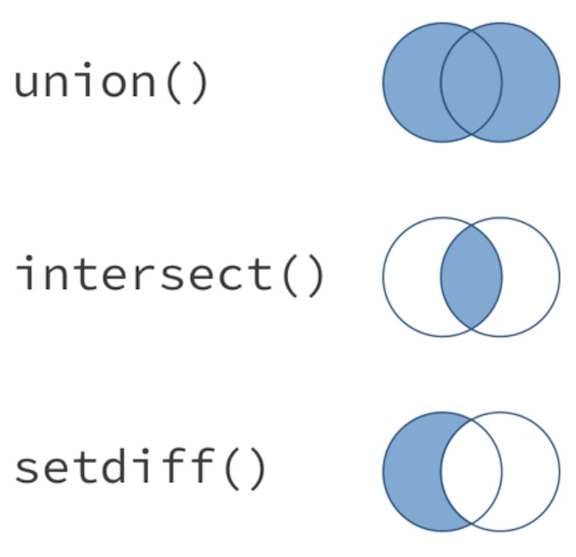

In [ ]:
# Quero unir a base de músicas da tabela aerosmith com os greatest_hits da banda.
aerosmith %>%
  union(greatest_hits) %>% 
   nrow()

[1] 24

In [ ]:
# Quero saber dentro das músicas que estão em greatest_hit
aerosmith %>%
  intersect(greatest_hits)

song,length
<chr>,<dbl>
Dream On,16080


In [ ]:
# Selecione as músicas que foram tocadas ao vivo
live_songs <-
  live %>% 
    select(song)

In [ ]:
# Selecionar as músicas do greatest hits
greatest_songs <- 
  greatest_hits %>% 
    select(song)

In [ ]:
# Create the new dataset using a set operation
live_songs %>%
  setdiff(greatest_songs)

song
<chr>
Sweet Emotion
Lord of the Thighs
Toys in the Attic
Last Child
Come Together
Walk this Way
Sick as a Dog
Dream On
Chip Away the Stone


##### Comparando datasets

É comum querer saber se um conjunto de dados é igual a outro conjunto de dados 

* **Setequal** de dplyr fará isso facilmente. 
* A **base R** idêntica só retornará verdadeiro se os conjuntos de dados tiverem exatamente as mesmas linhas na mesma ordem.

In [ ]:
head(aerosmith)

song,length
<chr>,<dbl>
Make It,13260
Somebody,13500
Dream On,16080
One Way Street,25200
Mama Kin,15900
Write me a Letter,15060


In [ ]:
aerosmith_order <- 
  aerosmith %>% 
    arrange(song)

aerosmith_order

song,length
<chr>,<dbl>
Dream On,16080
Make It,13260
Mama Kin,15900
Moving Out,18180
One Way Street,25200
Somebody,13500
Walking the Dog,11520
Write me a Letter,15060


In [ ]:
# Comparando aerosmith e aerosmith_order
setequal(aerosmith, aerosmith_order)

[1] TRUE

Ou seja, a ordem não muda as duas variáveis.

In [ ]:
# Identical que é do pacote base do R não faz o mesmo
identical(aerosmith, aerosmith_order)

[1] FALSE

In [ ]:
identical(aerosmith, aerosmith)

[1] TRUE

##### Assembring data

Base R binds
* rbind, cbind

dplyr binds
* bind_rows, bind_cols